In [2]:
import random
import math
import cv2
import numpy as np
from pathlib import Path
from PIL import Image
from  matplotlib import pyplot as plt


In [2]:
f = "./tmp/Cats_Test49.jpg"
f2 = "./tmp/golf.jpg"
im = plt.imread(f)
im2 = plt.imread(f2)

Text(0.5, 1.0, 'golf')

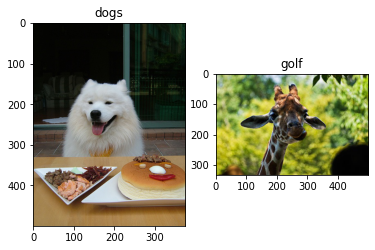

In [3]:
plt.subplot(1,2,1)
plt.imshow(im)
plt.title("dogs")
plt.subplot(1,2,2)
plt.imshow(im2)
plt.title("golf")

# HSV 变换

Text(0.5, 1.0, 'all')

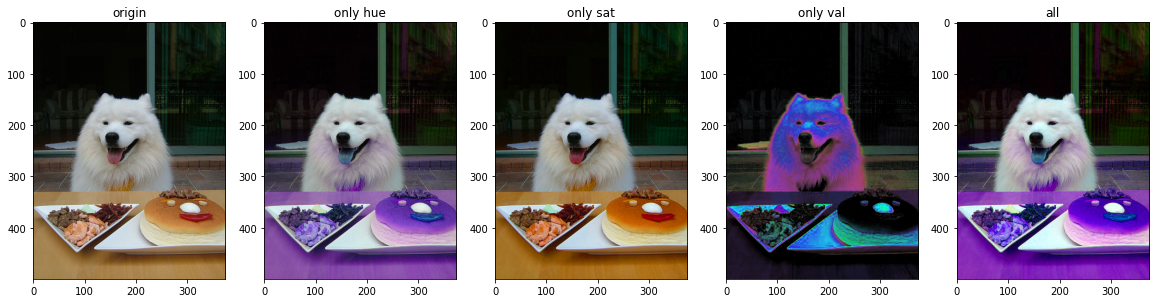

In [30]:
hgain=0.5 
sgain=0.5
vgain=0.5
r = np.random.uniform(-2, 2, 3) * [hgain, sgain, vgain] + 1


hue, sat, val = cv2.split(cv2.cvtColor(im, cv2.COLOR_BGR2HSV))
dtype = im.dtype  # uint8
x = np.arange(0, 256, dtype=r.dtype)

plt.figure(figsize=(20, 100)) 
plt.subplot(1,5,1)
plt.imshow(im)
plt.title("origin")

# 调整色调
lut_hue = ((x * r[0]) % 180).astype(dtype)

hue_image = cv2.merge(
    (cv2.LUT(hue, lut_hue), 
     cv2.LUT(sat,  np.clip(x, 0, 255).astype(dtype)), 
     cv2.LUT(val,  np.clip(x, 0, 255).astype(dtype))))
hue_image = cv2.cvtColor(hue_image, cv2.COLOR_HSV2BGR)
plt.subplot(1,5,2)
plt.imshow(hue_image)
plt.title("only hue")

# 调整饱和度
lut_sat = np.clip(x * r[1], 0, 255).astype(dtype)

sat_image = cv2.merge(
    (cv2.LUT(hue, np.clip(x, 0, 255).astype(dtype)), 
     cv2.LUT(sat, lut_sat), 
     cv2.LUT(val, np.clip(x, 0, 255).astype(dtype))))
sat_image = cv2.cvtColor(sat_image, cv2.COLOR_HSV2BGR)
plt.subplot(1,5,3)
plt.imshow(sat_image)
plt.title("only sat")

# 曝光调整
lut_val = np.clip(x * r[2], 0, 255).astype(dtype)

val_image = cv2.merge(
    (cv2.LUT(hue, np.clip(x, 0, 255).astype(dtype)), 
     cv2.LUT(sat, np.clip(x, 0, 255).astype(dtype)), 
     cv2.LUT(val, lut_val)))
sat_image = cv2.cvtColor(sat_image, cv2.COLOR_HSV2BGR)
plt.subplot(1,5,4)
plt.imshow(sat_image)
plt.title("only val")

# 综合调整
hsv_image = cv2.merge((cv2.LUT(hue, lut_hue), cv2.LUT(sat, lut_sat), cv2.LUT(val, lut_val)))
hsv_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
hsv_image = np.array(hsv_image, dtype=np.uint8)

plt.subplot(1,5,5)
plt.imshow(hsv_image)
plt.title("all")


# 旋转缩放

Text(0.5, 1.0, 'rotate_scale')

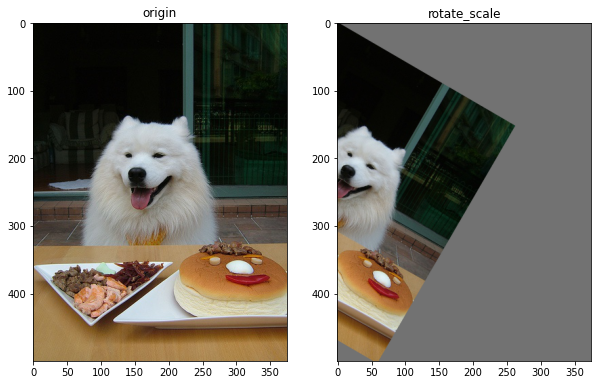

In [31]:
degrees = 45
scale = 0.5
h,w,_ = im.shape
# Rotation and Scale matrix
RS = np.eye(3)
angle = random.uniform(-degrees, degrees)
random_scale = random.uniform(1 - scale, 1 + scale)
RS[:2] = cv2.getRotationMatrix2D(angle=angle, center=(0, 0), scale=random_scale)

rotate_scale = cv2.warpPerspective(im, RS, dsize=(w, h), borderValue=(114, 114, 114))

plt.figure(figsize=(10, 20)) 
plt.subplot(1,2,1)
plt.imshow(im)
plt.title("origin")

plt.subplot(1,2,2)
plt.imshow(rotate_scale)
plt.title("rotate_scale")

# 平移

Text(0.5, 1.0, 'translate')

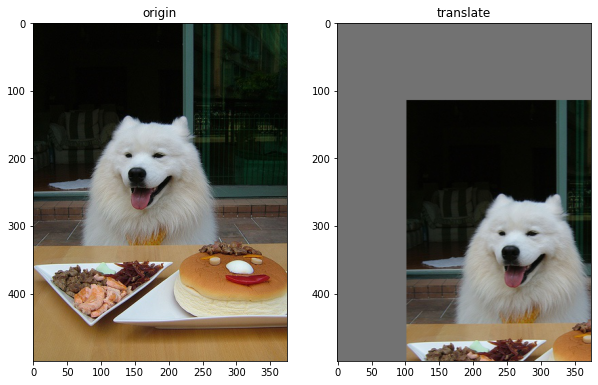

In [32]:
t=0.1
h,w,_ = im.shape
T = np.eye(3)
T[0, 2] = random.uniform(0.5 - t, 0.5 + t) * w * 0.5
T[1, 2] = random.uniform(0.5 - t, 0.5 + t) * h * 0.5
translate = cv2.warpPerspective(im, T, dsize=(w, h), borderValue=(114, 114, 114))

plt.figure(figsize=(10, 20)) 
plt.subplot(1,2,1)
plt.imshow(im)
plt.title("origin")

plt.subplot(1,2,2)
plt.imshow(translate)
plt.title("translate")

# 错切/非垂直投影

Text(0.5, 1.0, 'shear')

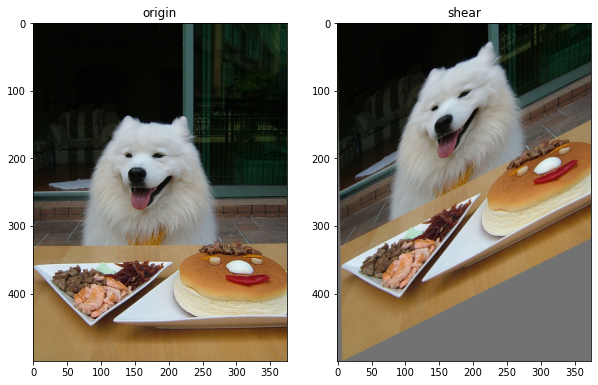

In [33]:
degree = 45
h,w,_ = im.shape
S = np.eye(3)
# 错切和旋转都是通过[0,1],[1,0]两个参数控制, 不同的是旋转两个参数互为相反数, 错切则不然
S[0, 1] = math.tan(random.uniform(-degree, degree) * math.pi / 180)
S[1, 0] = math.tan(random.uniform(-degree, degree) * math.pi / 180)

shear = cv2.warpPerspective(im, S, dsize=(w, h), borderValue=(114, 114, 114))

plt.figure(figsize=(10, 20)) 
plt.subplot(1,2,1)
plt.imshow(im)
plt.title("origin")

plt.subplot(1,2,2)
plt.imshow(shear)
plt.title("shear")

# 透视变换

Text(0.5, 1.0, 'perspective')

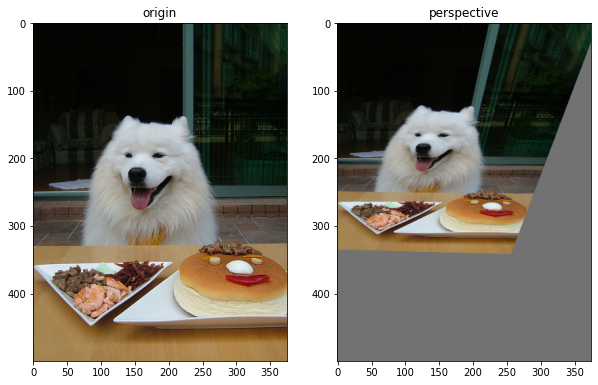

In [34]:
p = 0.001
h, w, c = im.shape
im_copy = im.copy()
P = np.eye(3)
P[2, 0] = random.uniform(-p, p)
P[2, 1] = random.uniform(-p, p)
perspective = cv2.warpPerspective(im_copy, P, dsize=(w, h), borderValue=(114, 114, 114))

plt.figure(figsize=(10, 20)) 
plt.subplot(1,2,1)
plt.imshow(im)
plt.title("origin")

plt.subplot(1,2,2)
plt.imshow(perspective)
plt.title("perspective")

# 翻转

Text(0.5, 1.0, 'right')

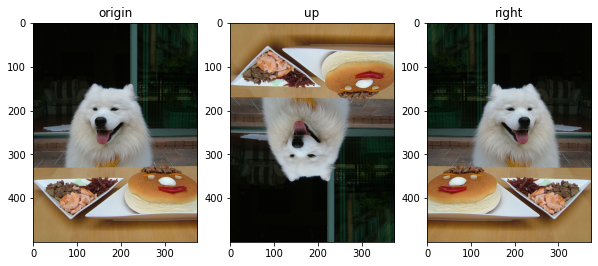

In [35]:
im_up = np.flipud(im)
im_right = np.fliplr(im)

plt.figure(figsize=(10, 30)) 
plt.subplot(1,3,1)
plt.imshow(im)
plt.title("origin")

plt.subplot(1,3,2)
plt.imshow(im_up)
plt.title("up")

plt.subplot(1,3,3)
plt.imshow(im_right)
plt.title("right")


# mosaic 

Text(0.5, 1.0, 'mosaic')

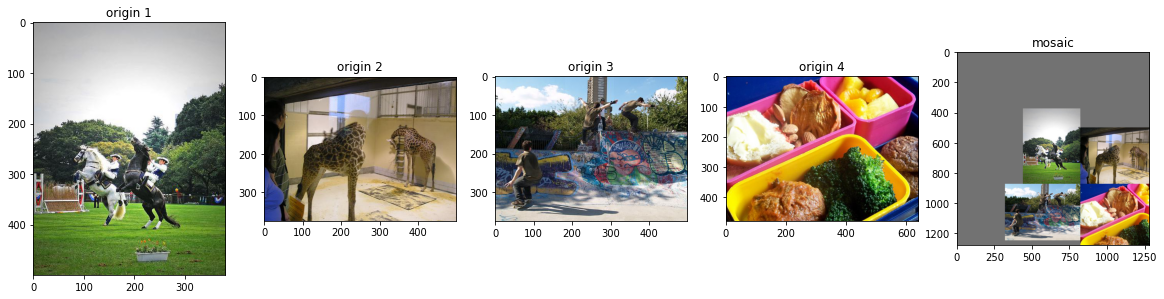

In [36]:
im_size=640
mosaic_border = [-im_size // 2, -im_size // 2]
labels4, segments4 = [], []
s = im_size
# 这里随机计算一个xy中心点
yc, xc = (int(random.uniform(-x, 2 * s + x)) for x in mosaic_border)  # mosaic center x, y
# indices = [index] + random.choices(self.indices, k=3)  # 3 additional image indices
# random.shuffle(indices)
im_files = [
    './tmp/000000000049.jpg',
    './tmp/000000000136.jpg',
    './tmp/000000000077.jpg',
    './tmp/000000000009.jpg',
]

img4 = np.full((s * 2, s * 2, 3), 114, dtype=np.uint8)
for i, file in enumerate(im_files):
    # Load image
    # img, _, (h, w) = load_image(self, index)
    img = cv2.imread(file)
    h, w, _ = np.shape(img)

    # place img in img4
    if i == 0:  # top left
        # base image with 4 tiles
        # 这里计算第一张图贴到左上角部分的一个 起点xy, 终点xy就是xc,yc
        x1a, y1a, x2a, y2a = max(xc - w, 0), max(yc - h, 0), xc, yc  # xmin, ymin, xmax, ymax (large image)
        # 计算主要是裁剪出要贴的图，避免越界了, 其实起点一般就是(0,0),如果上面xc<w,yc<h,这里就会被裁剪掉部分, 终点就是w,h
        x1b, y1b, x2b, y2b = w - (x2a - x1a), h - (y2a - y1a), w, h  # xmin, ymin, xmax, ymax (small image)
    elif i == 1:  # top right
        x1a, y1a, x2a, y2a = xc, max(yc - h, 0), min(xc + w, s * 2), yc
        x1b, y1b, x2b, y2b = 0, h - (y2a - y1a), min(w, x2a - x1a), h
    elif i == 2:  # bottom left
        x1a, y1a, x2a, y2a = max(xc - w, 0), yc, xc, min(s * 2, yc + h)
        x1b, y1b, x2b, y2b = w - (x2a - x1a), 0, w, min(y2a - y1a, h)
    elif i == 3:  # bottom right
        x1a, y1a, x2a, y2a = xc, yc, min(xc + w, s * 2), min(s * 2, yc + h)
        x1b, y1b, x2b, y2b = 0, 0, min(w, x2a - x1a), min(y2a - y1a, h)

    img4[y1a:y2a, x1a:x2a] = img[y1b:y2b, x1b:x2b]
    
    
plt.figure(figsize=(20, 100)) 
plt.subplot(1,5,1)
plt.imshow(plt.imread(im_files[0]))
plt.title("origin 1")

plt.subplot(1,5,2)
plt.imshow(plt.imread(im_files[1]))
plt.title("origin 2")

plt.subplot(1,5,3)
plt.imshow(plt.imread(im_files[2]))
plt.title("origin 3")

plt.subplot(1,5,4)
plt.imshow(plt.imread(im_files[3]))
plt.title("origin 4")

plt.subplot(1,5,5)
plt.imshow(img4[:,:,::-1])
plt.title("mosaic")

# mixup 图像融合

Text(0.5, 1.0, 'mix_up')

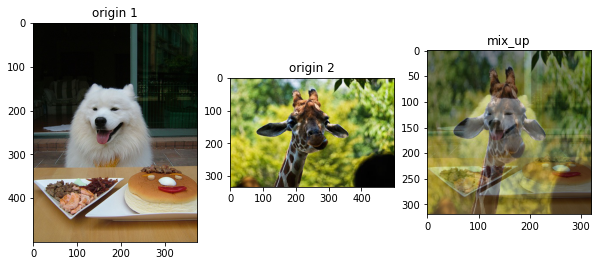

In [37]:
im_resize = cv2.resize(im,(320,320))
im2_resize = cv2.resize(im2,(320,320))
r = np.random.beta(32.0, 32.0)  # mixup ratio, alpha=beta=32.0
mix_up = (im_resize * r + im2_resize * (1 - r)).astype(np.uint8)

plt.figure(figsize=(10, 30)) 
plt.subplot(1,3,1)
plt.imshow(im)
plt.title("origin 1")

plt.subplot(1,3,2)
plt.imshow(im2)
plt.title("origin 2")

plt.subplot(1,3,3)
plt.imshow(mix_up)
plt.title("mix_up")

# copy paste 分割填补

loading annotations into memory...
Done (t=0.61s)
creating index...
index created!
image files already downloaded! size: 61
save image /Users/yang/PycharmProjects/yolov5_in_tf2_keras/data/./coco_2017_val_images/./372577.jpg, 0/2
save image /Users/yang/PycharmProjects/yolov5_in_tf2_keras/data/./coco_2017_val_images/./212559.jpg, 1/2


Text(0.5, 1.0, 'paste')

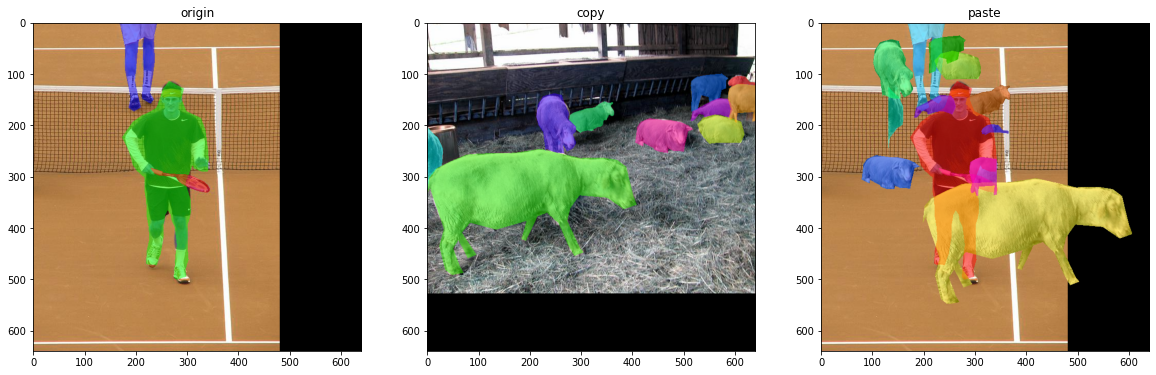

In [19]:
from generate_coco_data import CoCoDataGenrator
from visual_ops import draw_instance

def bbox_iou(box1, box2, eps=1E-7):
    """ Returns the intersection over box2 area given box1, box2. Boxes are x1y1x2y2
    box1:       np.array of shape(4)
    box2:       np.array of shape(nx4)
    returns:    np.array of shape(n)
    """
    box2 = box2.transpose()
    # Get the coordinates of bounding boxes
    b1_x1, b1_y1, b1_x2, b1_y2 = box1[0], box1[1], box1[2], box1[3]
    b2_x1, b2_y1, b2_x2, b2_y2 = box2[0], box2[1], box2[2], box2[3]
    # Intersection area
    inter_area = (np.minimum(b1_x2, b2_x2) - np.maximum(b1_x1, b2_x1)).clip(0) * \
                 (np.minimum(b1_y2, b2_y2) - np.maximum(b1_y1, b2_y1)).clip(0)
    # box2 area
    box2_area = (b2_x2 - b2_x1) * (b2_y2 - b2_y1) + eps
    # Intersection over box2 area
    return inter_area / box2_area

def copy_paste(im_origin, boxes_origin, im_masks, masks, mask_boxes, p=1.):
    """ 分割填补,  https://arxiv.org/abs/2012.07177
    :param boxes_origin:  [[x1,y1,x2,y2], ....]
    :param masks: [h,w,instances]
    """

    out_boxes = []
    out_masks = []
    n = masks.shape[-1]
    im_new = im_origin.copy()
    if p and n:
        h, w, c = im_origin.shape  # height, width, channels
        for j in random.sample(range(n), k=round(p * n)):
            start_x = np.random.uniform(0, w // 2)
            start_y = np.random.uniform(0, h // 2)
            box, mask = mask_boxes[j], masks[:, :, j:j + 1]
            new_box = [
                int(start_x),
                int(start_y),
                int(min(start_x + (box[2] - box[0]), w)),
                int(min(start_y + (box[3] - box[1]), h))
            ]
            iou = bbox_iou(new_box, boxes_origin)
            if (iou < 0.90).all():
                mask_im = (im_masks * mask)[
                          box[1]:int((new_box[3] - new_box[1]) + box[1]),
                          box[0]:int((new_box[2] - new_box[0])) + box[0], :]
                new_mask_im = np.zeros(shape=(h, w, 3), dtype=int)
                new_mask_im[new_box[1]:new_box[3], new_box[0]:new_box[2], :] = mask_im
                # cv2.imshow("", np.array(new_mask_im, dtype=np.uint8))

                target_mask = mask[
                              box[1]:int((new_box[3] - new_box[1]) + box[1]),
                              box[0]:int((new_box[2] - new_box[0])) + box[0], :]
                new_mask = np.zeros(shape=(h, w, 1), dtype=int)
                new_mask[new_box[1]:new_box[3], new_box[0]:new_box[2], :] = target_mask
                out_boxes.append(new_box)
                out_masks.append(new_mask)

                im_new = im_new * (1 - new_mask) + new_mask_im * new_mask

    out_boxes = np.array(out_boxes)
    out_masks = np.concatenate(out_masks, axis=-1)
    im_new = np.array(im_new, dtype=np.uint8)
    return im_new, out_boxes, out_masks



file = "./instances_val2017.json"
coco = CoCoDataGenrator(
    coco_annotation_file=file,
    train_img_nums=2,
    include_mask=True,
    include_keypoint=False,
    batch_size=2)
data = coco.next_batch()
gt_imgs = data['imgs']
gt_boxes = data['bboxes']
gt_classes = data['labels']
gt_masks = data['masks']
valid_nums = data['valid_nums']
im_new, out_boxes, out_masks = copy_paste(
    im_origin=gt_imgs[0],
    boxes_origin=gt_boxes[0][:valid_nums[0]],
    im_masks=gt_imgs[1],
    masks=gt_masks[1][:, :, :valid_nums[1]],
    mask_boxes=gt_boxes[1][:valid_nums[1]])
final_masks = np.concatenate([gt_masks[0][:, :, :valid_nums[0]], out_masks], axis=-1)
im_new = draw_instance(im_new, final_masks)

img0 = gt_imgs[0]
img0 = draw_instance(img0, gt_masks[0][:, :, :valid_nums[0]])

img1 = gt_imgs[1]
img1 = draw_instance(img1, gt_masks[1][:, :, :valid_nums[1]])


plt.figure(figsize=(20, 60)) 
plt.subplot(1,3,1)
plt.imshow(img0)
plt.title("origin")

plt.subplot(1,3,2)
plt.imshow(img1)
plt.title("copy")

plt.subplot(1,3,3)
plt.imshow(im_new)
plt.title("paste")